In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("Telecom_customer_churn1.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#df[df["TotalCharges"]==" "]=0
#df['TotalCharges']=df['TotalCharges'].astype(float)
x= df.drop(['customerID','Churn'],axis=1)
y=df.Churn
x_train,x_val,y_train,y_val=train_test_split(x,y,random_state=0)


In [ ]:
df.SeniorCitizen=df.SeniorCitizen.astype("object")

In [ ]:
df[df.gender=="Male"].describe()

,tenure,MonthlyCharges,TotalCharges
count,3549.000000,3549.000000,3549.000000
mean,32.550296,64.387546,2283.407861
std,24.640929,30.099725,2263.100874
min,1.000000,18.250000,18.800000
25%,9.000000,35.400000,397.000000
50%,29.000000,70.100000,1404.650000
75%,56.000000,89.900000,3771.500000
max,72.000000,118.350000,8684.800000


In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
df[df.gender=="Female"].describe()

,tenure,MonthlyCharges,TotalCharges
count,3483.000000,3483.000000,3483.000000
mean,32.290841,65.216652,2283.190985
std,24.450235,30.070508,2270.830254
min,1.000000,18.400000,18.850000
25%,9.000000,35.900000,402.875000
50%,29.000000,70.650000,1387.350000
75%,55.000000,89.850000,3819.800000
max,72.000000,118.750000,8672.450000


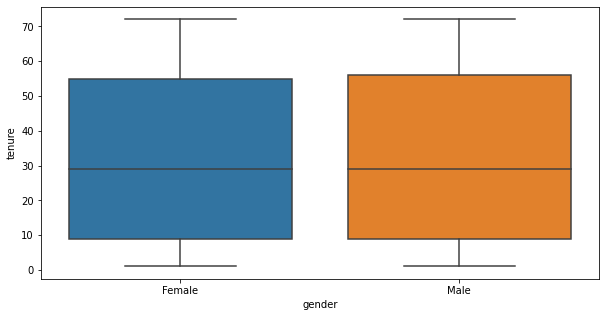

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='gender', y='tenure', data=df, showfliers = False)

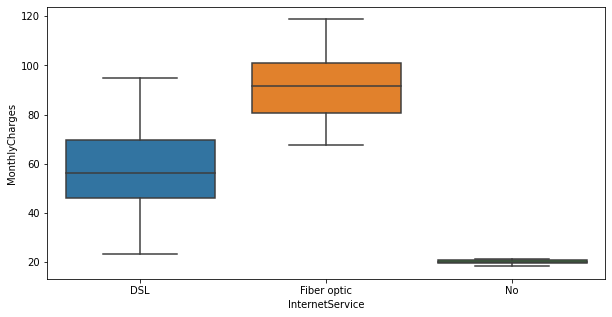

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='InternetService', y='MonthlyCharges', data=df, showfliers = False)

In [ ]:
x_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5274.000000,5274.000000,5274.000000,5274.000000
mean,0.160220,32.117179,64.825360,2265.200673
std,0.366845,24.498132,30.006111,2260.184728
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.762500,402.525000
50%,0.000000,28.000000,70.350000,1373.700000
75%,0.000000,55.000000,89.887500,3781.512500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
s = (x_train.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(x_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(x_val[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = x_train.index
OH_cols_valid.index = x_val.index

In [ ]:
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = x_train.drop(object_cols, axis=1)
num_X_valid = x_val.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)


In [ ]:
OH_X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
3534,0,72,108.65,7726.35,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3498,0,68,19.95,1377.70,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6705,0,11,89.20,990.30,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2861,0,12,84.60,1017.35,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6600,0,1,20.10,20.10,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
#from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(OH_X_train, y_train)
y_preds = forest_model.predict(OH_X_valid)
res1=confusion_matrix(y_val,y_preds)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print("Confusion matrix\n",res1)
Accuracy1=(res1[0][0]+res1[1][1])/res1.sum()
print("Accuracy of random forest model:",Accuracy1)

Confusion matrix
 [[1186  125]
 [ 237  210]]
Accuracy of random forest model: 0.7940841865756542
